## Includes

In [1]:
import math

import numpy as np

import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Constants

In [2]:
# Fontsizes
suptitle_size = 26
title_size = 24
axislabel_size = 24
axistick_size = 20
legendtitle_size = 20
legendlabel_size = 16

# Colors
color_range=cm.viridis(np.linspace(0,0.8,4))

## Surface area-to-volume plot

### Constants

In [3]:
pi = 3.14159
um = 1e-6            # micrometer
nm = 1e-9            # nanometer

lam = 1*nm           # Debye length

### Calculate

In [4]:
rs = [1*nm, 3*nm, 10*nm, 30*nm, 100*nm, 300*nm, 1000*nm, 3000*nm]
ratios = [(r**2-(r-lam)**2)/(r**2) for r in rs]

### Plot

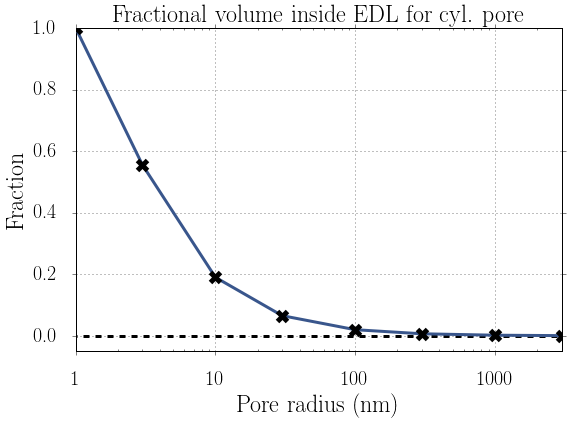

In [18]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(rs, ratios, 'kx', ms = 10, mew = 5, mec = 'black', color = color_range[1], lw = 3, ls = '-', zorder = 3)
plt.semilogx([.1*nm,1], [0,0], lw = 3, c = 'black', ls = '--', zorder = 2)

plt.xlim(min(rs), max(rs))
plt.ylim(-0.05, 1.0)


plt.title('Fractional volume inside EDL for cyl. pore', size = title_size)
plt.xlabel('Pore radius (nm)', size = axislabel_size)
plt.ylabel('Fraction', size = axislabel_size)

ax = plt.gca()
ax.set_xticklabels(['', '1', '10', '100', '1000'])
ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.grid()

plt.savefig('fractional_volume.png', dpi = 300)

plt.show()

## Debye length plot

### Constants

In [6]:
nm = 10**(-9.)                                                     # nanometer
z = 1                                                              # Valency
e = 1.6*10**(-19.)                                                 # Elementary charge
N = 6.02*10**23.                                                   # Avogadro's number
epsilon_0 = 8.85*10**(-12.)                                        # Permittivity free space
epsilon_r = 80                                                     #      ""      water
T = 273.15                                                         # Room temp
k_B = 1.38*10**(-23.)                                              # Boltzmann constant
C0s = np.array([1, 3, 10, 30, 100, 300, 1000])*N                   # Bulk concentrations

### Calculate

In [7]:
kappas = np.array([((2*z**2*e**2*C0)/(epsilon_0*epsilon_r*k_B*T))**.5 for C0 in C0s])
debye_lengths = np.array([1./kappa for kappa in kappas])/nm

### Plot

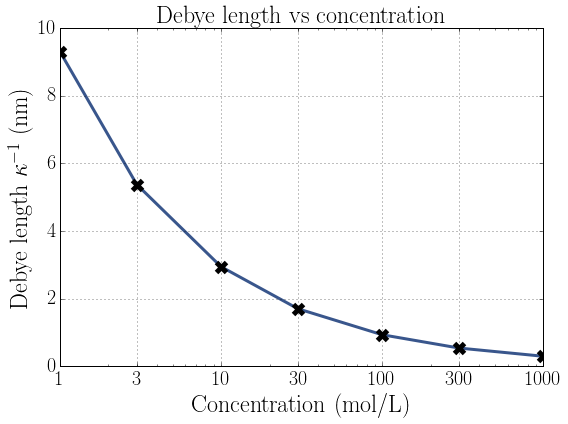

In [8]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(C0s/N, debye_lengths, 'kx', ms = 10, mew = 5, mec = 'black', color = color_range[1], lw = 3, ls = '-')



plt.title('Debye length vs concentration', size = title_size)
plt.xlabel('Concentration (mol/L)', size = axislabel_size)
plt.ylabel('Debye length $\kappa^{-1}$ (nm)', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

ax = plt.gca()

plt.xticks([1, 3, 10, 30, 100, 300, 1000], ['1', '3', '10', '30', '100', '300', '1000'])

plt.savefig('debye_length.png', dpi = 600)

plt.show()

## Potential, ion number densities

#### Constants

In [9]:
nm = 10**(-9.)                                                     # nanometer
z = 1                                                              # Valency
e = 1.6*10**(-19.)                                                 # Elementary charge
N = 6.02*10**23.                                                   # Avogadro's number
epsilon_0 = 8.85*10**(-12.)                                        # Permittivity free space
epsilon_r = 80                                                     #      ""      water
T = 273.15                                                         # Room temp
k_B = 1.38*10**(-23.)                                              # Boltzmann constant
C_0 = 100*N                                                        # Bulk concentration
kappa = (2*z**2*e**2*C_0/(epsilon_0*epsilon_r*k_B*T))**.5          # Inverse Debye length

sigmas = np.array([0.025, 0.05, 0.1, 0.25])*-1*e/(nm**2.)            # Surface charges

### Grahame-equation
- This is a transcendental equation linking surface charge density to electrostatic potential
- Use the Brent algorithm in scipy to solve, which finds the roots of an equation

In [10]:
def grahame(psi_0):
    return sigma-epsilon_0*epsilon_r*psi_0*kappa*2*k_B*T/(z**2.*e*psi_0)*math.sinh(z**2.*e*psi_0/(2*k_B*T))

In [11]:
psi_0s = []
for i, sigma in enumerate(sigmas):
    psi_0s.append(scipy.optimize.brentq(grahame, -0.4, 0.4))
psi_0s = np.array(psi_0s)

In [12]:
print psi_0s

[-0.0052463  -0.01042894 -0.02038655 -0.04527549]


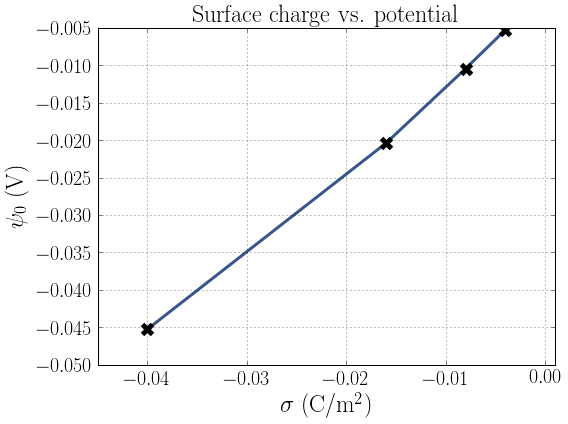

In [13]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.plot(sigmas, psi_0s, 'kx', ls = '-', lw = 3, ms = 10, mew = 5, mec = 'black', color = color_range[1])

plt.xlim(sigmas.min()-.005, sigmas.max()+.005)

plt.title('Surface charge vs. potential', size = title_size)
plt.xlabel('$\sigma$ (C/m$^{2}$)', size = axislabel_size)
plt.ylabel('$\psi_{0}$ (V)', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

plt.savefig('sigma_potential.png', dpi = 300)

plt.show()

### Potential

In [14]:
xs = np.array([i*.01*kappa**(-1) for i in range(1000)]) # Generate x values; we're going out to 10 debye lengths from the surface

psis = []

for i, psi_0 in enumerate(psi_0s):
    psis.append([])
    for x in xs:
        psis[i].append(2*k_B*T/(z*e)*np.log((1+math.tanh(z**2.*e*psi_0/(4*k_B*T))*np.exp(-kappa*x))/
                                            (1-math.tanh(z**2.*e*psi_0/(4*k_B*T))*np.exp(-kappa*x))))

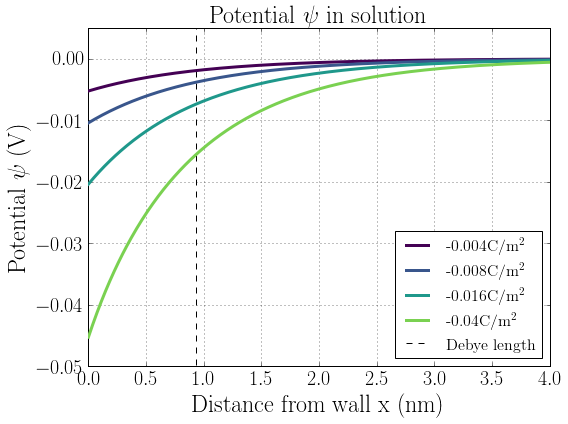

In [15]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

for i, psi in enumerate(psis):
    plt.plot(xs/nm, psi, lw = 3, label = str(sigmas[i]) + 'C/m$^{2}$', zorder = 10, color = color_range[i])
    
plt.plot(np.array([kappa**(-1.), kappa**(-1.)])/nm, [-1, 1], ls = '--', lw = 1, zorder = 1, color = 'black', label = 'Debye length')

    
plt.xlim(0, 4)
plt.ylim(-0.05, 0.005)
    
plt.title('Potential $\psi$ in solution', size = title_size)
plt.xlabel('Distance from wall x (nm)', size = axislabel_size)
plt.ylabel('Potential $\psi$ (V)', size = axislabel_size)

plt.legend(loc = 'lower right', fontsize = legendlabel_size)
    
plt.grid()
plt.tick_params(labelsize = axistick_size)
    
plt.savefig('potential.png', dpi = 600)
    
plt.show()

### Concentrations

In [16]:
c_ps = []
c_ms = []
c_totals = []
c_diffs = []

for i, psi_0 in enumerate(psi_0s):
    c_ps.append([])
    c_ms.append([])
    c_totals.append([])
    c_diffs.append([])
    
    for j, psi in enumerate(psis[i]):
        c_ps[i].append(C_0*np.exp(-z*e*psi/(k_B*T)))
        c_ms[i].append(C_0*np.exp(z*e*psi/(k_B*T)))
        c_totals[i].append(c_ps[i][j]+c_ms[i][j])
        c_diffs[i].append(c_ps[i][j]-c_ms[i][j])

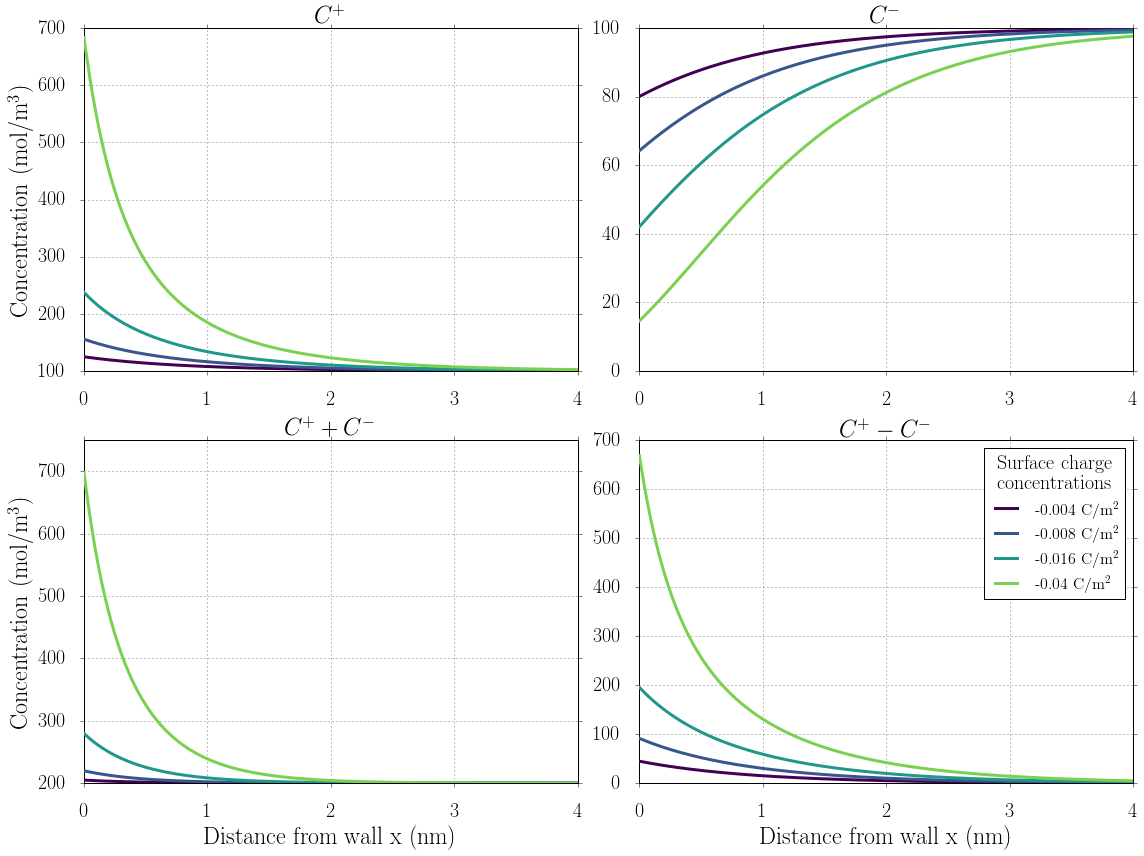

In [19]:
# Create plot environment
fig, ax = plt.subplots(2, 2, figsize = (16,12), tight_layout = True)


# Plot 0

plt.sca(ax[0,0])

for i, c_p in enumerate(c_ps):
    plt.plot(xs/nm, np.array(c_p)/N, lw = 3, label = str(sigmas[i]) + ' C/m$^{2}$', zorder = 10, c = color_range[i])
    
    
plt.xlim(0, 4)
plt.ylim(100, 700)
    
plt.title('$C^{+}$', size = title_size)
plt.ylabel('Concentration (mol/m$^{3}$)', size = axislabel_size)

    
plt.grid()
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.xticks([0, 1, 2, 3, 4])




# Plot 1

plt.sca(ax[0,1])

for i, c_m in enumerate(c_ms):
    plt.plot(xs/nm, np.array(c_m)/N, lw = 3, label = str(sigmas[i]) + ' C/m$^{2}$', zorder = 10, c = color_range[i])

    
plt.xlim(0, 4)
plt.ylim(0,100)
    
plt.title('$C^{-}$', size = title_size)

    
plt.grid()
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.xticks([0, 1, 2, 3, 4])



# Plot 2

plt.sca(ax[1,0])

for i, c_total in enumerate(c_totals):
    plt.plot(xs/nm, np.array(c_total)/N, lw = 3, label = str(sigmas[i]) + ' C/m$^{2}$', zorder = 10, c = color_range[i])

    
plt.xlim(0, 4)
plt.ylim(200, 750)
    
plt.title('$C^{+}+C^{-}$', size = title_size)
plt.xlabel('Distance from wall x (nm)', size = axislabel_size)
plt.ylabel('Concentration (mol/m$^{3}$)', size = axislabel_size)


    
plt.grid()
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.xticks([0, 1, 2, 3, 4])

# Plot 3

plt.sca(ax[1,1])

for i, c_diff in enumerate(c_diffs):
    plt.plot(xs/nm, np.array(c_diff)/N, lw = 3, label = str(sigmas[i]) + ' C/m$^{2}$', zorder = 10, c = color_range[i])
    

    
plt.xlim(0, 4)
plt.ylim(0,700)
    
plt.title('$C^{+}-C^{-}$', size = title_size)
plt.xlabel('Distance from wall x (nm)', size = axislabel_size)

leg = plt.legend(loc = 'upper right', fontsize = legendlabel_size)
leg.set_title('Surface charge\nconcentrations')
leg.get_title().set_fontsize(legendtitle_size)
    
plt.grid()
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.xticks([0, 1, 2, 3, 4])



# Create the figure
    
plt.savefig('concentrations.png', dpi = 600)
    
plt.show()